In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [2]:
raw = pd.read_excel('Working in Theatre_Coding_Jenna.xlsx')
print(raw.shape)
questions = raw.columns
print(questions)

(70, 20)
Index(['Timestamp', 'Email Address', 'Name', 'Year graduated or expected',
       'Entertainment industry/industry related jobs within the last 2 years',
       'Current entertainment industry/industry related job',
       'Future entertainment industry/industry related jobs lined up',
       'Job Discipline_Coding', 'IndustryJobs_Coding',
       'Why did you choose UMD for theatre?', 'WhyUMD_Coding',
       'What do you see the job future of the entertainment industry looking like in 5 years? ',
       'Contact info - if you want to share it.',
       'Were the expectations you had for your theatre education met at UMD?',
       'exceeded',
       'What experiences and/or opportunities offered in your theatre education at UMD were most valuable to you?',
       'ValuableExp_Coding',
       'In what ways have the creative tools of this degree aided in your previous/current/future employment? (Related and/or Non-Industry Related)',
       'Transferrable_Coding', 'Coding'],
    

## General Notes:
- 70 responses to 13 questions
- Rename columns for internal use
- Categorical coding needed for multiple questions
- Word clouds for some responses?

In [3]:
# Creating the dictionary for renaming
cols = {
    'Timestamp': 'Time',
    'Email Address': 'Email',
    'Name': 'Name',
    'Year graduated or expected': 'GradYear',
    'Entertainment industry/industry related jobs within the last 2 years': 'RecentJobs',
    'Current entertainment industry/industry related job': 'CurrentJob',
    'Future entertainment industry/industry related jobs lined up': 'FutureJobs',
    'Why did you choose UMD for theatre?': 'WhyUMD',
    'What do you see the job future of the entertainment industry looking like in 5 years? ': 'FutureEntInd',
    'Contact info - if you want to share it.': 'ContactInfo',
    'Were the expectations you had for your theatre education met at UMD?': 'ExpectationsMet',
    'What experiences and/or opportunities offered in your theatre education at UMD were most valuable to you?': 'ValuableExperiences',
    'In what ways have the creative tools of this degree aided in your previous/current/future employment? (Related and/or Non-Industry Related)': 'DegreeImpact'
}

# Renaming the columns
data = raw.rename(columns=cols)
data.columns

Index(['Time', 'Email', 'Name', 'GradYear', 'RecentJobs', 'CurrentJob',
       'FutureJobs', 'Job Discipline_Coding', 'IndustryJobs_Coding', 'WhyUMD',
       'WhyUMD_Coding', 'FutureEntInd', 'ContactInfo', 'ExpectationsMet',
       'exceeded', 'ValuableExperiences', 'ValuableExp_Coding', 'DegreeImpact',
       'Transferrable_Coding', 'Coding'],
      dtype='object')

In [5]:
data.GradYear.value_counts()

2021                             7
2013                             6
2017                             6
2020                             5
2010                             5
2015                             3
2023                             3
2018                             3
2011                             3
2019                             3
2009                             2
1989                             2
2022                             2
2016                             2
1993                             2
May 2023                         1
1996                             1
2025                             1
2014                             1
Graduated 2011                   1
December 2021 (Class of 2022)    1
Spring 2024                      1
Fall 2024                        1
2005                             1
2004                             1
2008 undergrad, 2011 Masters     1
2000                             1
Spring 2010                      1
1991                

In [6]:
# Function to extract the first four-digit number from a string
def extract_year(value):
    if pd.isnull(value):
        return None
    match = re.search(r'\d{4}', str(value))
    return int(match.group()) if match else None

# Apply the function to the 'GradYear' column
data['GradYear'] = data['GradYear'].apply(extract_year)

# Convert only non-null values to integers
data['GradYear'] = data['GradYear'].dropna().astype('Int64')

# Display the first few rows to verify the changes
data.GradYear.value_counts()


2021    8
2013    6
2017    6
2010    6
2020    5
2011    4
2023    4
2018    3
2019    3
2015    3
2016    2
2022    2
2024    2
2009    2
1989    2
1993    2
1996    1
2025    1
2014    1
2005    1
2004    1
2008    1
2000    1
1991    1
Name: GradYear, dtype: Int64

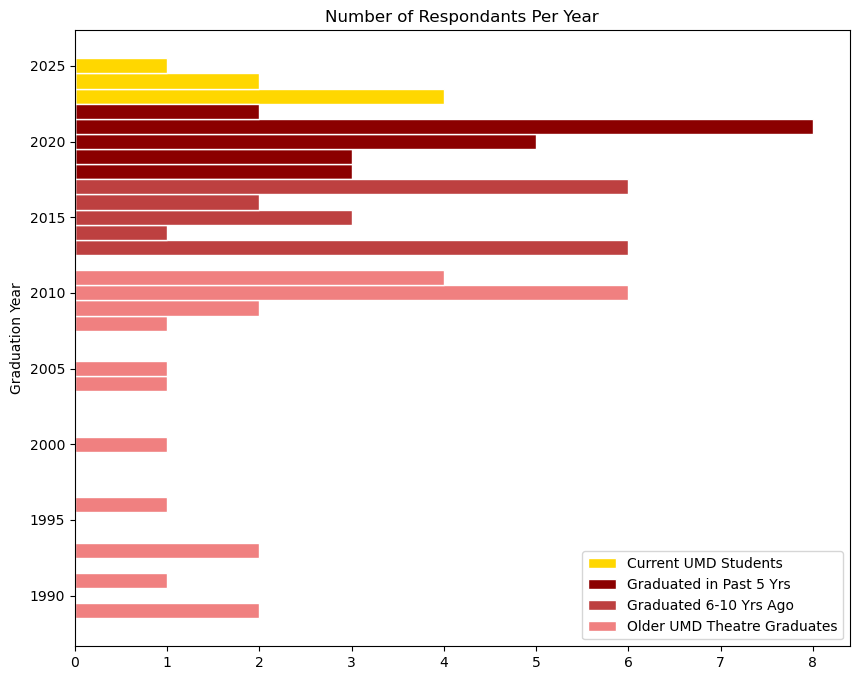

In [8]:
# Adjusting the bins so that each year falls into its own distinct bin
# Setting bin edges at half-year marks to clearly separate each year
half_year_bins = [year - 0.5 for year in range(data['GradYear'].min(), data['GradYear'].max() + 2)]

# Create a horizontal histogram with the adjusted bins
plt.figure(figsize=(10, 8))

# Plotting the histogram for years 2023 and later in gold
plt.hist(data[data['GradYear'] >= 2023]['GradYear'], 
         bins=half_year_bins, 
         orientation='horizontal', 
         color='gold', 
         edgecolor='white', 
         label='Current UMD Students'
        )

# Plotting the histogram for years before 2023 in darkred
plt.hist(data[(data['GradYear'] >= 2018) & (data['GradYear'] <= 2022)]['GradYear'], 
         bins=half_year_bins, 
         orientation='horizontal', 
         color='darkred', 
         edgecolor='white',
         label='Graduated in Past 5 Yrs'
        )

plt.hist(data[(data['GradYear'] >= 2013) & (data['GradYear'] <= 2017)]['GradYear'],
         bins=half_year_bins, 
         orientation='horizontal', 
         color='#bd4040', 
         edgecolor='white', 
         label='Graduated 6-10 Yrs Ago')


# Plotting the histogram for years before 2012 in lightcoral
plt.hist(data[data['GradYear'] < 2012]['GradYear'], 
         bins=half_year_bins, 
         orientation='horizontal', 
         color='lightcoral', 
         edgecolor='white',
         label='Older UMD Theatre Graduates'
        )

# Adding labels and title
# plt.xlabel('Number of Respondants')
plt.ylabel('Graduation Year')
plt.title('Number of Respondants Per Year')

plt.legend()

# Show the plot
plt.show()


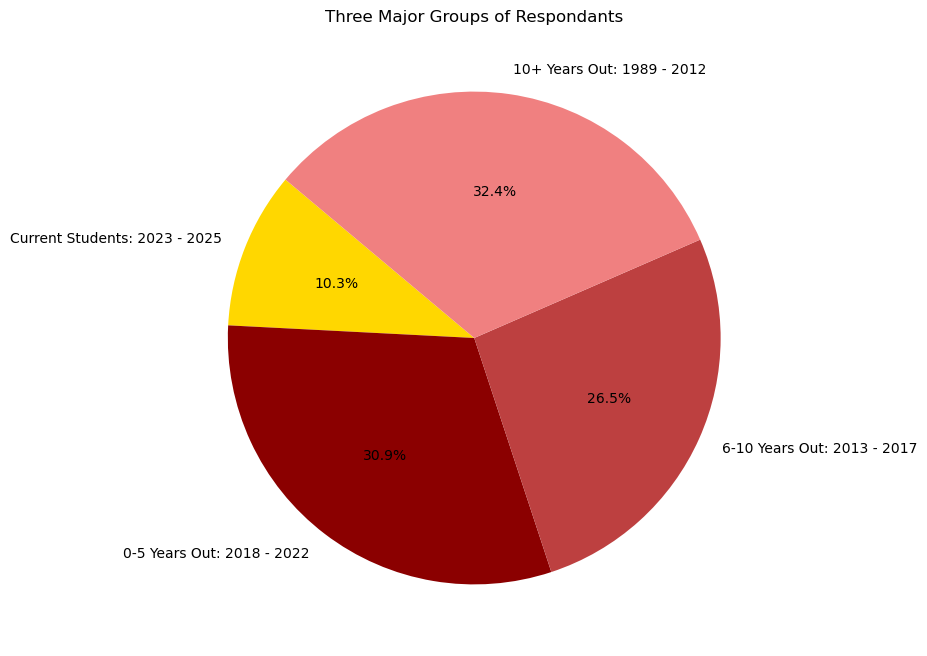

In [10]:
# Preparing data for the pie chart
# Counting the number of respondents in each range
count_2023_2025 = data[(data['GradYear'] >= 2023) & (data['GradYear'] <= 2025)].shape[0]
count_2018_2022 = data[(data['GradYear'] >= 2018) & (data['GradYear'] < 2023)].shape[0]
count_2013_2017 = data[(data['GradYear'] >= 2013) & (data['GradYear'] < 2018)].shape[0]
count_1989_2012 = data[(data['GradYear'] >= 1989) & (data['GradYear'] < 2013)].shape[0]

# Data to plot
sizes = [count_2023_2025, count_2018_2022, count_2013_2017, count_1989_2012]
labels = ['Current Students: 2023 - 2025', '0-5 Years Out: 2018 - 2022', '6-10 Years Out: 2013 - 2017', '10+ Years Out: 1989 - 2012']
colors = ['gold', 'darkred','#bd4040', 'lightcoral']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%')

# Adding title
plt.title('Three Major Groups of Respondants')

# Show the plot
plt.show()


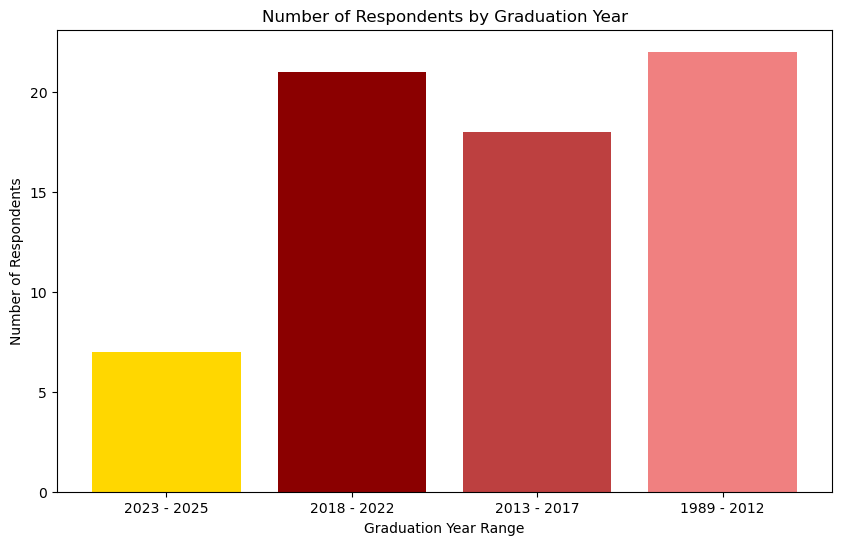

In [11]:
# Data setup from your provided code
sizes = [count_2023_2025, count_2018_2022, count_2013_2017, count_1989_2012]
labels = ['2023 - 2025', '2018 - 2022', '2013 - 2017', '1989 - 2012']
colors = ['gold', 'darkred', '#bd4040', 'lightcoral']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors)

# Adding title and labels
plt.title('Number of Respondents by Graduation Year')
plt.xlabel('Graduation Year Range')
plt.ylabel('Number of Respondents')

# Show the plot
plt.show()


In [12]:
data.ExpectationsMet.value_counts()

Yes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

#### Expectations Met
- Recommend adding a column that codes these responses on a categorical scale: 
  - 4: Exceeded
  - 3: Met
  - 2: Equivocal
  - 1: Not Met
  - 0: No Response

In [13]:
data.WhyUMD.value_counts()

I definitely chose the program because it was clear there was an opportunity to demonstrate my ability to learn and grow and develop my talents rather than be expected to be incredibly polished from the start. I think any program you get out of it is matched by what you're willing to put into it yourself, and I know I received significant training and valuable skills, as well as a better sense of myself as an artist and a real sense of community within the department there. There are absolutely tools and work habits and knowledge that I consistently apply to every professional opportunity I'm involved in.     1
Close to home, excellent program                                                                                                                                                                                                                                                                                                                                                             

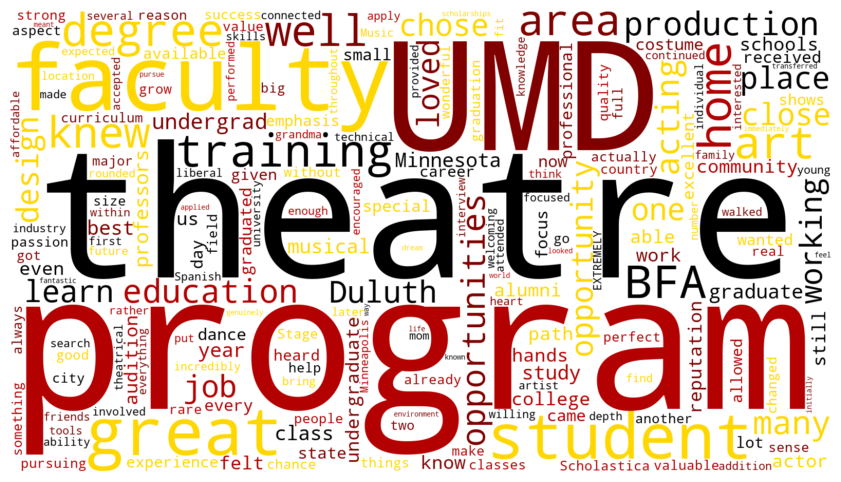

In [56]:
# Text from the "WhyUMD" column
text = " ".join(response for response in data['WhyUMD'].dropna())

# Replace 'theater' with 'theatre' in the text
text = text.replace('theater', 'theatre')
text = text.replace('staff', 'faculty')
text = text.replace('teachers', 'faculty')
text = text.replace('department', 'program')


# Stopwords list - adding 'school'
stopwords = list(STOPWORDS)
stopwords = stopwords + ['school', 't', 'St', 'didn', 's']

# Custom color function for shades of maroon, gold, and black
def maroon_gold_black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#800000', '#b30000', '#FFD700', '#000000']  # Shades of maroon, gold, and black
    return np.random.choice(colors)

# Creating an oval-shaped mask 2x wider
x, y = np.ogrid[:900, :1600]  # height 300, width 1200
mask = (x - 150) ** 2 + (y - 600) ** 2 > 150 ** 2
mask = 455 * mask.astype(int)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white", 
                      mask=mask, 
                      collocations = False, 
                      color_func=maroon_gold_black_color_func
                     ).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))  # Adjust figure size to accommodate wider shape
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [14]:
data.columns

Index(['Time', 'Email', 'Name', 'GradYear', 'RecentJobs', 'CurrentJob',
       'FutureJobs', 'Job Discipline_Coding', 'IndustryJobs_Coding', 'WhyUMD',
       'WhyUMD_Coding', 'FutureEntInd', 'ContactInfo', 'ExpectationsMet',
       'exceeded', 'ValuableExperiences', 'ValuableExp_Coding', 'DegreeImpact',
       'Transferrable_Coding', 'Coding'],
      dtype='object')

In [15]:
data['Job Discipline_Coding'].value_counts()


performer-stage                                                                        11
stage manager                                                                           3
design-costume, educator                                                                2
design-set, technician-scenic artist                                                    2
technician-costume                                                                      2
technician-audio                                                                        2
arts administrator                                                                      1
writer, stage manager, choreographer, educator                                          1
performer-stage, performer-screen, producer-stage                                       1
design-lighting, design-video, technician-lighting, technician-video, sales             1
design-lighting, design-video, technical director                                       1
arts admin